# Initial Prep
## Importing Data and Libraries

In [73]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib.dates as mdates

# Importing Amazon Sale Report.csv
df = pd.read_csv('Amazon Sale Report.csv')

## Data Cleaning

In [13]:
df.info()

# Setting 'Order ID' as Index for its uniqueness per order
df.set_index('Order ID')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
Order ID,,,,,,,,,,,,,,,,
405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False
402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False
407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False


In [15]:
# Dropping useless and blank Columns 
df.drop(['index','fulfilled-by', 'New', 'PendingS'],axis = 1, inplace = True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

In [17]:
# Checking for null values in each columns
pd.isnull(df).sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency              7800
Amount                7800
ship-city               35
ship-state              35
ship-postal-code        35
ship-country            35
B2B                      0
dtype: int64

In [18]:
# Dropping Null Values
df.dropna(subset=['Amount','currency'], inplace=True)
pd.isnull(df).sum()

Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Category               0
Size                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city             33
ship-state            33
ship-postal-code      33
ship-country          33
B2B                    0
dtype: int64

In [78]:
df['Date'] = pd.to_datetime(df['Date'])
df['ship-postal-code'] = df['ship-postal-code'].fillna(0).astype(int)
df['Amount'] = pd.to_numeric(df['Amount'])

# Sales Overview
## Overall Sales Performance
### Daily Sales Overview (Line Chart)

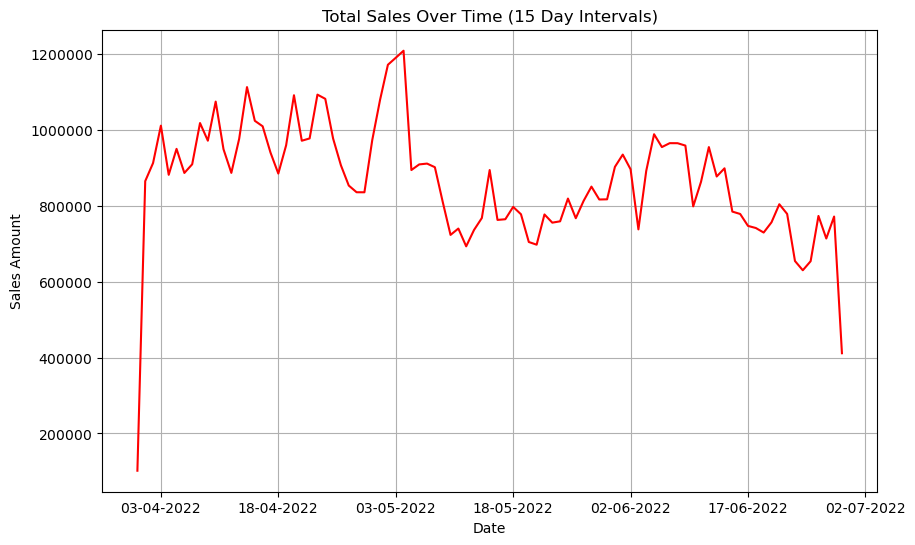

In [157]:
# Group by date and sum the 'Amount'
sales_over_time = df.groupby('Date')['Amount'].sum().reset_index()


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sales_over_time['Date'], sales_over_time['Amount'],color='red')  

# 15-day interval for x-axis labels
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) 
# Title, labels, and grid
plt.title('Total Sales Over Time (15 Day Intervals)')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### Monthly Sales Overview (Bar Chart)

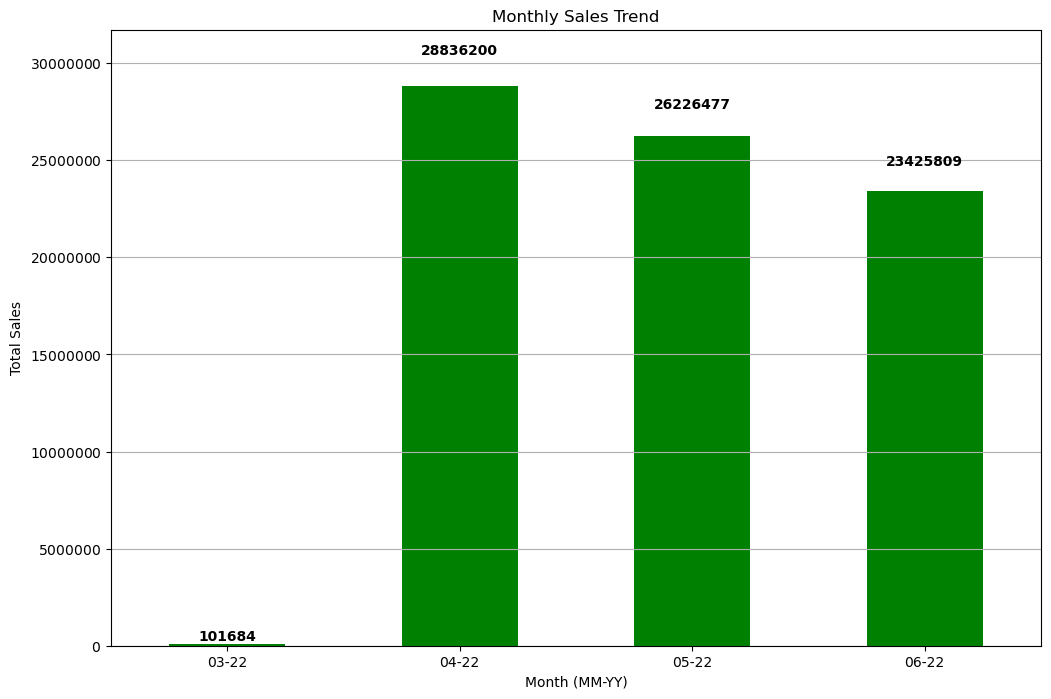

In [155]:
# Taking months from Dates
monthly_sales = df.resample('M', on='Date')['Amount'].sum()
monthly_sales.index = monthly_sales.index.strftime('%m-%y')
fig, ax = plt.subplots(figsize=(12, 8))  # Create figure and axes for more control
monthly_sales.plot(kind='bar', color='green', ax=ax, title='Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month (MM-YY)')  # Update x-axis label
plt.xticks(rotation=0)  # Ensure month labels are horizontal
plt.grid(axis='y')
max_sales = monthly_sales.max() * 1.1
plt.ylim(bottom=0, top=max_sales)
for i, v in enumerate(monthly_sales):
    ax.text(i, v + v * 0.05, f"{v:.0f}", ha='center',va = 'bottom', fontsize=10, fontweight='bold', clip_box=ax.bbox)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


### Yearly Sales Overview -

In [154]:
yearly_sales = df.resample('Y', on='Date')['Amount'].sum()
yearly_sales.index =yearly_sales.index.strftime('%y')
yearly_sales

Date
22    78590170.25
Name: Amount, dtype: float64